In [ ]:
import numpy
import pandas
import matplotlib.pyplot as plt
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error


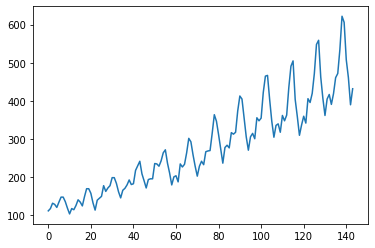

In [ ]:
dataset = pandas.read_csv('airline-passengers.csv', usecols=[1], engine='python')
plt.plot(dataset)
plt.show()

# **LSTM Network for Regression**

In [ ]:
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)

In [ ]:
# fix random seed for reproducibility
numpy.random.seed(7)
# load the dataset
dataset = dataset.values
dataset = dataset.astype('float32')


# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)


# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [ ]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
94/94 - 2s - loss: 0.0420
Epoch 2/100
94/94 - 0s - loss: 0.0216
Epoch 3/100
94/94 - 0s - loss: 0.0171
Epoch 4/100
94/94 - 0s - loss: 0.0158
Epoch 5/100
94/94 - 0s - loss: 0.0148
Epoch 6/100
94/94 - 0s - loss: 0.0139
Epoch 7/100
94/94 - 0s - loss: 0.0130
Epoch 8/100
94/94 - 0s - loss: 0.0121
Epoch 9/100
94/94 - 0s - loss: 0.0112
Epoch 10/100
94/94 - 0s - loss: 0.0105
Epoch 11/100
94/94 - 0s - loss: 0.0096
Epoch 12/100
94/94 - 0s - loss: 0.0088
Epoch 13/100
94/94 - 0s - loss: 0.0080
Epoch 14/100
94/94 - 0s - loss: 0.0072
Epoch 15/100
94/94 - 0s - loss: 0.0064
Epoch 16/100
94/94 - 0s - loss: 0.0057
Epoch 17/100
94/94 - 0s - loss: 0.0050
Epoch 18/100
94/94 - 0s - loss: 0.0045
Epoch 19/100
94/94 - 0s - loss: 0.0039
Epoch 20/100
94/94 - 0s - loss: 0.0035
Epoch 21/100
94/94 - 0s - loss: 0.0031
Epoch 22/100
94/94 - 0s - loss: 0.0028
Epoch 23/100
94/94 - 0s - loss: 0.0026
Epoch 24/100
94/94 - 0s - loss: 0.0023
Epoch 25/100
94/94 - 0s - loss: 0.0022
Epoch 26/100
94/94 - 0s - loss: 0.

In [ ]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

In [ ]:
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 22.61 RMSE
Test Score: 54.75 RMSE


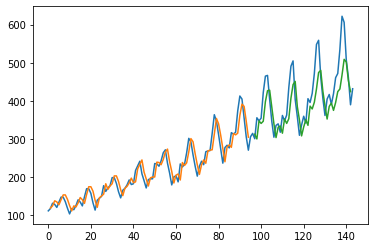

In [ ]:
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

# **LSTM for Regression Using the Window Method**

In [ ]:
#creating dataset for window method
dataframe = pandas.read_csv('airline-passengers.csv', usecols=[1], engine='python')
dataset = dataframe.values
dataset = dataset.astype('float32')
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
# reshape into X=t and Y=t+1
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [ ]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
92/92 - 1s - loss: 0.0616
Epoch 2/100
92/92 - 0s - loss: 0.0304
Epoch 3/100
92/92 - 0s - loss: 0.0199
Epoch 4/100
92/92 - 0s - loss: 0.0160
Epoch 5/100
92/92 - 0s - loss: 0.0143
Epoch 6/100
92/92 - 0s - loss: 0.0128
Epoch 7/100
92/92 - 0s - loss: 0.0113
Epoch 8/100
92/92 - 0s - loss: 0.0098
Epoch 9/100
92/92 - 0s - loss: 0.0084
Epoch 10/100
92/92 - 0s - loss: 0.0072
Epoch 11/100
92/92 - 0s - loss: 0.0062
Epoch 12/100
92/92 - 0s - loss: 0.0054
Epoch 13/100
92/92 - 0s - loss: 0.0049
Epoch 14/100
92/92 - 0s - loss: 0.0045
Epoch 15/100
92/92 - 0s - loss: 0.0043
Epoch 16/100
92/92 - 0s - loss: 0.0040
Epoch 17/100
92/92 - 0s - loss: 0.0039
Epoch 18/100
92/92 - 0s - loss: 0.0039
Epoch 19/100
92/92 - 0s - loss: 0.0038
Epoch 20/100
92/92 - 0s - loss: 0.0038
Epoch 21/100
92/92 - 0s - loss: 0.0037
Epoch 22/100
92/92 - 0s - loss: 0.0036
Epoch 23/100
92/92 - 0s - loss: 0.0037
Epoch 24/100
92/92 - 0s - loss: 0.0036
Epoch 25/100
92/92 - 0s - loss: 0.0036
Epoch 26/100
92/92 - 0s - loss: 0.

In [ ]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

In [ ]:
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 23.96 RMSE
Test Score: 63.46 RMSE


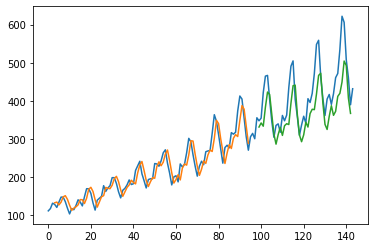

In [ ]:
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()











# **LSTM for Regression with Time Steps**

In [ ]:
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
# reshape into X=t and Y=t+1
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = numpy.reshape(testX, (testX.shape[0], testX.shape[1], 1))

In [ ]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(look_back, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
92/92 - 1s - loss: 0.0460
Epoch 2/100
92/92 - 0s - loss: 0.0187
Epoch 3/100
92/92 - 0s - loss: 0.0146
Epoch 4/100
92/92 - 0s - loss: 0.0128
Epoch 5/100
92/92 - 0s - loss: 0.0113
Epoch 6/100
92/92 - 0s - loss: 0.0100
Epoch 7/100
92/92 - 0s - loss: 0.0086
Epoch 8/100
92/92 - 0s - loss: 0.0075
Epoch 9/100
92/92 - 0s - loss: 0.0065
Epoch 10/100
92/92 - 0s - loss: 0.0057
Epoch 11/100
92/92 - 0s - loss: 0.0051
Epoch 12/100
92/92 - 0s - loss: 0.0050
Epoch 13/100
92/92 - 0s - loss: 0.0045
Epoch 14/100
92/92 - 0s - loss: 0.0043
Epoch 15/100
92/92 - 0s - loss: 0.0043
Epoch 16/100
92/92 - 0s - loss: 0.0043
Epoch 17/100
92/92 - 0s - loss: 0.0042
Epoch 18/100
92/92 - 0s - loss: 0.0041
Epoch 19/100
92/92 - 0s - loss: 0.0040
Epoch 20/100
92/92 - 0s - loss: 0.0042
Epoch 21/100
92/92 - 0s - loss: 0.0040
Epoch 22/100
92/92 - 0s - loss: 0.0039
Epoch 23/100
92/92 - 0s - loss: 0.0040
Epoch 24/100
92/92 - 0s - loss: 0.0039
Epoch 25/100
92/92 - 0s - loss: 0.0039
Epoch 26/100
92/92 - 0s - loss: 0.

In [ ]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

In [ ]:
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 27.47 RMSE
Test Score: 61.76 RMSE


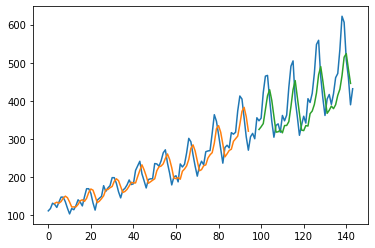

In [ ]:
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

# **LSTM with Memory Between Batches**

In [ ]:
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
# reshape into X=t and Y=t+1
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = numpy.reshape(testX, (testX.shape[0], testX.shape[1], 1))

In [ ]:
batch_size = 2
model = Sequential()
model.add(LSTM(4, batch_input_shape=(batch_size, look_back, 1), stateful=True))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
for i in range(100):
	model.fit(trainX, trainY, epochs=1, batch_size=batch_size, verbose=2, shuffle=False)
	model.reset_states()

46/46 - 1s - loss: 0.0483
46/46 - 0s - loss: 0.0233
46/46 - 0s - loss: 0.0140
46/46 - 0s - loss: 0.0123
46/46 - 0s - loss: 0.0119
46/46 - 0s - loss: 0.0106
46/46 - 0s - loss: 0.0089
46/46 - 0s - loss: 0.0071
46/46 - 0s - loss: 0.0056
46/46 - 0s - loss: 0.0048
46/46 - 0s - loss: 0.0047
46/46 - 0s - loss: 0.0046
46/46 - 0s - loss: 0.0046
46/46 - 0s - loss: 0.0046
46/46 - 0s - loss: 0.0045
46/46 - 0s - loss: 0.0045
46/46 - 0s - loss: 0.0045
46/46 - 0s - loss: 0.0045
46/46 - 0s - loss: 0.0045
46/46 - 0s - loss: 0.0044
46/46 - 0s - loss: 0.0044
46/46 - 0s - loss: 0.0044
46/46 - 0s - loss: 0.0044
46/46 - 0s - loss: 0.0044
46/46 - 0s - loss: 0.0044
46/46 - 0s - loss: 0.0043
46/46 - 0s - loss: 0.0043
46/46 - 0s - loss: 0.0043
46/46 - 0s - loss: 0.0043
46/46 - 0s - loss: 0.0043
46/46 - 0s - loss: 0.0043
46/46 - 0s - loss: 0.0043
46/46 - 0s - loss: 0.0043
46/46 - 0s - loss: 0.0042
46/46 - 0s - loss: 0.0042
46/46 - 0s - loss: 0.0042
46/46 - 0s - loss: 0.0042
46/46 - 0s - loss: 0.0042
46/46 - 0s -

In [ ]:
# make predictions
trainPredict = model.predict(trainX, batch_size=batch_size)
model.reset_states()
testPredict = model.predict(testX, batch_size=batch_size)

In [ ]:
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 29.43 RMSE
Test Score: 76.04 RMSE


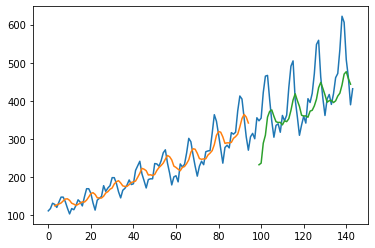

In [ ]:
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()







# **Stacked LSTMs with Memory Between Batches**

In [ ]:
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
# reshape into X=t and Y=t+1
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = numpy.reshape(testX, (testX.shape[0], testX.shape[1], 1))

In [ ]:
# create and fit the LSTM network
batch_size = 1
model = Sequential()
model.add(LSTM(4, batch_input_shape=(batch_size, look_back, 1), stateful=True, return_sequences=True))
model.add(LSTM(4, batch_input_shape=(batch_size, look_back, 1), stateful=True))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
for i in range(100):
	model.fit(trainX, trainY, epochs=1, batch_size=batch_size, verbose=2, shuffle=False)
	model.reset_states()

92/92 - 2s - loss: 0.0049
92/92 - 0s - loss: 0.0111
92/92 - 0s - loss: 0.0075
92/92 - 0s - loss: 0.0060
92/92 - 0s - loss: 0.0056
92/92 - 0s - loss: 0.0057
92/92 - 0s - loss: 0.0057
92/92 - 0s - loss: 0.0057
92/92 - 0s - loss: 0.0057
92/92 - 0s - loss: 0.0057
92/92 - 0s - loss: 0.0057
92/92 - 0s - loss: 0.0057
92/92 - 0s - loss: 0.0057
92/92 - 0s - loss: 0.0056
92/92 - 0s - loss: 0.0056
92/92 - 0s - loss: 0.0056
92/92 - 0s - loss: 0.0056
92/92 - 0s - loss: 0.0056
92/92 - 0s - loss: 0.0056
92/92 - 0s - loss: 0.0055
92/92 - 0s - loss: 0.0055
92/92 - 0s - loss: 0.0055
92/92 - 0s - loss: 0.0055
92/92 - 0s - loss: 0.0054
92/92 - 0s - loss: 0.0054
92/92 - 0s - loss: 0.0054
92/92 - 0s - loss: 0.0054
92/92 - 0s - loss: 0.0053
92/92 - 0s - loss: 0.0053
92/92 - 0s - loss: 0.0053
92/92 - 0s - loss: 0.0053
92/92 - 0s - loss: 0.0052
92/92 - 0s - loss: 0.0052
92/92 - 0s - loss: 0.0052
92/92 - 0s - loss: 0.0051
92/92 - 0s - loss: 0.0051
92/92 - 0s - loss: 0.0051
92/92 - 0s - loss: 0.0050
92/92 - 0s -

In [ ]:
# make predictions
trainPredict = model.predict(trainX, batch_size=batch_size)
model.reset_states()
testPredict = model.predict(testX, batch_size=batch_size)

In [ ]:
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 22.56 RMSE
Test Score: 72.18 RMSE


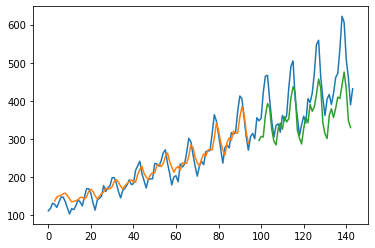

In [ ]:
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()